# Limpieza de bienes raíces

Este es un conjunto de datos (dataset) reales que fue descargado usando técnicas de web scraping. La data contiene registros de **Fotocasa**, el cual es uno de los sitios más populares de bienes raíces en España. Por favor no hagas esto (web scraping) a no ser que sea para propósitos académicos.

El dataset fue descargado hace algunos años por Henry Navarro y en ningún caso se obtuvo beneficio económico de ello.

Contiene miles de datos de casas reales publicadas en la web www.fotocasa.com. Tu objetivo es extraer tanta información como sea posible con el conocimiento que tienes hasta ahora de ciencia de datos, por ejemplo ¿cuál es la casa más cara en todo el dataset?

Empecemos precisamente con esa pregunta... ¡Buena suerte!

#### Ejercicio 00. Lee el dataset assets/real_estate.csv e intenta visualizar la tabla (★☆☆)

In [1]:
import pandas as pd

# Este archivo CSV contiene puntos y comas en lugar de comas como separadores
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


#### Ejercicio 01. ¿Cuál es la casa más cara en todo el dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle del Prado, Nº20 es la más cara y su precio es de 5000000 USD`

In [2]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds = ds.drop_duplicates()
ds['price'] = pd.to_numeric(ds['price'], errors='coerce').fillna(0)

get_formatted_string = lambda str: ' '.join(str.strip().split())

most_expensive = ds.loc[ds['price'].idxmax()]
price_formatted = f"{most_expensive['price']:,.2f} EUR"

print(f"La casa con dirección en {get_formatted_string(most_expensive['address'])}, es la más cara y su precio es de {price_formatted}")

La casa con dirección en El Escorial, es la más cara y su precio es de 8,500,000.00 EUR


#### Ejercicio 02. ¿Cuál es la casa más barata del dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle Alcalá, Nº58 es la más barata y su precio es de 12000 USD`

In [3]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds = ds.drop_duplicates()
ds['price'] = pd.to_numeric(ds['price'], errors='coerce').fillna(0)
prices_list = ds[ds['price'] > 0]

get_formatted_string = lambda str: ' '.join(str.strip().split())

cheapest = ds.loc[prices_list['price'].idxmin()]
price_formatted = f"{cheapest['price']:,.2f} EUR"

print(f"La casa con dirección en {get_formatted_string(cheapest['address'])}, es la más barata y su precio es de {price_formatted}")

La casa con dirección en Berlin, Coslada, es la más barata y su precio es de 600.00 EUR


#### Ejercicio 03. ¿Cuál es la casa más grande y la más pequeña del dataset? (★☆☆)

Imprime la dirección y el área de las casas seleccionadas. Por ejemplo:

`La casa más grande está ubicada en Calle Gran Vía, Nº38 y su superficie es de 5000 metros`

`La casa más pequeña está ubicada en Calle Mayor, Nº12 y su superficie es de 200 metros`

In [4]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds = ds.drop_duplicates()
ds['price'] = pd.to_numeric(ds['price'], errors='coerce').fillna(0)
surfaces_list = ds[ds['surface'] > 0]

get_formatted_string = lambda str: ' '.join(str.strip().split())

biggest_row = ds.loc[surfaces_list['surface'].idxmax()]
smallest_row = ds.loc[surfaces_list['surface'].idxmin()]

print(f"La casa más grande está ubicada en {get_formatted_string(biggest_row['address'])} y su superficie es de {round(biggest_row['surface'])} metros")
print(f"La casa más pequeña está ubicada en {get_formatted_string(smallest_row['address'])} y su superficie es de {round(smallest_row['surface'])} metros")

La casa más grande está ubicada en Sevilla la Nueva y su superficie es de 249000 metros
La casa más pequeña está ubicada en Calle Amparo, Madrid Capital y su superficie es de 15 metros


#### Ejercicio 04. ¿Cuantas poblaciones (columna level5) contiene el dataset? (★☆☆)

Imprime el nombre de las poblaciones separadas por coma. Por ejemplo:

`> print(populations)`

`population1, population2, population3, ...`

In [5]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')

get_formatted_string = lambda str: ' '.join(str.strip().split())

populations = ds['level5'].unique().tolist()
formatted_populations = [get_formatted_string(each) for each in populations]
populations_list = ', '.join(formatted_populations)

print(f"Hay un total de {len(populations)} poblaciones:")
print(populations_list)

Hay un total de 168 poblaciones:
Arganda del Rey, Fuenlabrada, Boadilla del Monte, Las Rozas de Madrid, Madrid Capital, Villaviciosa de Odón, Pinto, Valdemoro, Navalcarnero, Pozuelo de Alarcón, Torrejón de Ardoz, Navalagamella, San Sebastián de los Reyes, Rivas-vaciamadrid, Alpedrete, Móstoles, San Fernando de Henares, Coslada, Becerril de la Sierra, Alcalá de Henares, Chinchón, Parla, Alcorcón, El Escorial, Leganés, Pedrezuela, Majadahonda, Villanueva de la Cañada, Villanueva del Pardillo, Torrelodones, Moralzarzal, Mejorada del Campo, Aranjuez, Corpa, Getafe, Velilla de San Antonio, Sevilla la Nueva, San Martín de la Vega, Villalbilla, Collado Villalba, Alcobendas, El Molar (Madrid), Moraleja de Enmedio, Algete, Campo Real, Torrejón de la Calzada, Colmenar Viejo, Valdemorillo, Fuente El Saz de Jarama, Tres Cantos, Arroyomolinos (Madrid), Griñón, Paracuellos de Jarama, Guadarrama, Titulcia, Galapagar, Collado Mediano, Los Molinos, San Lorenzo de El Escorial, Loeches, San Martín de Val

#### Ejercicio 05. ¿El dataset contiene valores no admitidos (NAs)? (★☆☆)

Imprima un booleano (`True` o `False`) seguido de la fila/columna que contiene el NAs.

In [6]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')

contains_nas = ds.isnull().any()
print(contains_nas)

Unnamed: 0          False
id_realEstates      False
isNew               False
realEstate_name      True
phone_realEstate     True
url_inmueble        False
rooms                True
bathrooms            True
surface              True
price               False
date                False
description          True
address             False
country             False
level1              False
level2              False
level3              False
level4               True
level5              False
level6               True
level7               True
level8               True
upperLevel          False
countryId           False
level1Id            False
level2Id            False
level3Id            False
level4Id            False
level5Id            False
level6Id            False
level7Id            False
level8Id            False
accuracy            False
latitude            False
longitude           False
zipCode              True
customZone           True
dtype: bool


#### Ejercicio 06. Elimina los NAs del dataset, si aplica (★★☆)

Imprima una comparación entre las dimensiones del DataFrame original versus el DataFrame después de las eliminaciones.


In [7]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds['price'] = pd.to_numeric(ds['price'], errors='coerce').fillna(0)

shape_before = ds.shape
rows_before = ds.shape[0]
columns_before = ds.shape[1]

ds.dropna(axis=1, how='all', inplace=True)

shape_after = ds.shape
rows_after = ds.shape[0]
columns_after = ds.shape[1]

print(f'Tras eliminar NAs y duplicados, el dataset pasa de {shape_before} a {shape_after}, lo que implica que se han eliminado {columns_before - columns_after} columnas y {rows_before - rows_after} filas.')

Tras eliminar NAs y duplicados, el dataset pasa de (15335, 37) a (15335, 35), lo que implica que se han eliminado 2 columnas y 0 filas.


#### Ejercicio 07. ¿Cuál la media de precios en la población (columna level5) de "Arroyomolinos (Madrid)"? (★★☆)

Imprima el valor obtenido.

In [8]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds = ds.drop_duplicates()
ds['price'] = pd.to_numeric(ds['price'], errors='coerce').fillna(0)

def get_mean_price(zone):
    zone_data = ds[ds['level5'].str.contains(zone)]

    if zone_data.empty:
        print(f"No se encontraron datos para la zona '{zone}'.")
        return

    zone_formated_data = zone_data[zone_data['price'] > 0]
    mean_price = zone_formated_data['price'].mean()
    return f"La media de precios de Arroyomolinos (Madrid) es de {mean_price:,.2f} EUR"

print(get_mean_price('Arroyomolinos'))

La media de precios de Arroyomolinos (Madrid) es de 298,905.18 EUR


#### Ejercicio 08. Trazar el histograma de los precios para la población (level5 column) de "Arroyomolinos (Madrid)" y explica qué observas (★★☆)

Imprime el histograma de los precios y escribe en la celda del Markdown un breve análisis del trazado.


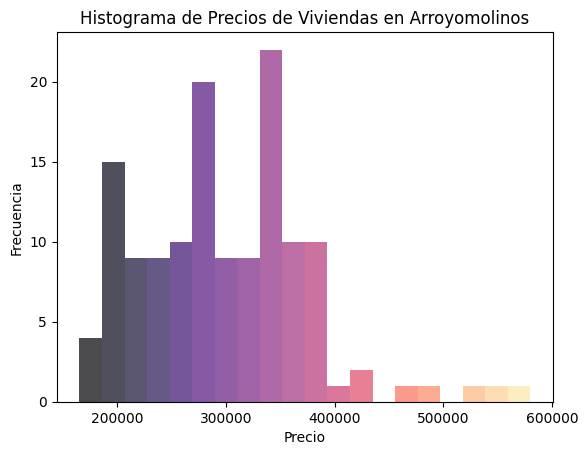

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds = ds.drop_duplicates()
ds['price'] = pd.to_numeric(ds['price'], errors='coerce').fillna(0)
prices_list = ds[ds['price'] > 0]

arroyomolinos_data = prices_list[prices_list['level5'].str.contains('Arroyomolinos', na=False)]

if not arroyomolinos_data.empty:
    counts, bins, patches = plt.hist(arroyomolinos_data['price'], alpha=0.7, bins=20)
    
    cmap = plt.cm.magma
    num_bins = len(bins) - 1

    for i, patch in enumerate(patches):
        color = cmap(i / num_bins)
        patch.set_facecolor(color)

    plt.title('Histograma de Precios de Viviendas en Arroyomolinos')
    plt.xlabel('Precio')
    plt.ylabel('Frecuencia')
    plt.show()
else:
    print("No hay datos disponibles para Arroyomolinos.")

En el historigrama se observa que la mayor concentración de viviendas está en el rango de precios entre 200.000€ y 400.000€. Aunque podemos encontrar algunas de precio inferior (entre 150.000€ y 200.000€ aproximadamente) o superior (entre 400.000€ y 600.000€) la frecuencia es mucho menor. Además, a pesar de que hay casos tanto en los niveles superiores como inferiores al rango de precios medio, de entre estos podemos apreciar que hay una tendencia a los de precio más alto. En conclusión, este análisis básico sugiere que el mercado inmobiliario en esta zona está centrado en un rango de precios medios, con algunas excepciones hacia los extremos de la distribución y entre ellos una tendencia a los precios superiores.

#### Ejercicio 09. ¿Son los precios promedios de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios y escribe una conclusión sobre ellos.

In [10]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds = ds.drop_duplicates()
ds['price'] = pd.to_numeric(ds['price'], errors='coerce').fillna(0)
prices_list = ds[ds['price'] > 0]

get_zone_data = lambda zone: ds[ds['level5'].str.contains(zone)]
get_percentage = lambda a, b: (a / b) * 100 if b != 0 else 0
get_formatted_price = lambda price: f"{price:,.2f} EUR"

def get_mean_price(zone):
    zone_data = get_zone_data(zone)
    zone_formated_data = zone_data[zone_data['price'] > 0]

    if zone_formated_data.empty:
        print(f"No se encontraron datos para {zone}")
        return 0
    else:
        return round(zone_formated_data['price'].mean(), 2)

valdemorillo_price = get_mean_price('Valdemorillo')
galapagar_price = get_mean_price('Galapagar')
percentage = get_percentage(valdemorillo_price, galapagar_price)

if valdemorillo_price > 0 and galapagar_price > 0:
    diff = abs(round(percentage - 100, 2))
    comparison = 'bajos' if percentage - 100 < 0 else 'altos'

    print(f"Precio promedio en Valdemorillo: {get_formatted_price(valdemorillo_price)}")
    print(f"Precio promedio en Galapagar: {get_formatted_price(galapagar_price)}")
    print(f"Los precios en Valdemorillo son un {diff}% más {comparison} que los de Galapagar.")
else:
    print("No se puede calcular la comparación entre las dos zonas debido a datos insuficientes.")

Precio promedio en Valdemorillo: 363,860.29 EUR
Precio promedio en Galapagar: 360,063.20 EUR
Los precios en Valdemorillo son un 1.05% más altos que los de Galapagar.


#### Ejercicio 10. ¿Son los promedios de precio por metro cuadrado (precio/m2) de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios de precio por metro cuadrado y escribe una conclusión sobre ellos.

Pista: Crea una nueva columna llamada `pps` (*price per square* o precio por metro cuadrado) y luego analiza los valores.

In [11]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds = ds.drop_duplicates()
ds['price'] = pd.to_numeric(ds['price'], errors='coerce').fillna(0)
ds['surface'] = pd.to_numeric(ds['surface'], errors='coerce').fillna(0)

ds['pps'] = ds['price'] / ds['surface']
ds['pps'] = ds['pps'].fillna(0).replace([float('inf'), -float('inf')], 0)

def get_mean_pps(zone):
    zone_data = ds[ds['level5'].str.contains(zone, na=False) & (ds['pps'] > 0)]

    if zone_data.empty:
        print(f"No se encontraron datos para la zona '{zone}'.")
        return 0
    else:
        mean_pps = zone_data['pps'].mean()
        return round(mean_pps, 2) if pd.notna(mean_pps) else 0
    
get_percentage = lambda a, b: (a / b) * 100 if b != 0 else 0
get_formatted_price = lambda price: f"{price:,.2f} EUR"

valdemorillo_mean_pps = get_mean_pps('Valdemorillo')
galapagar_mean_pps = get_mean_pps('Galapagar')
percentage = get_percentage(valdemorillo_mean_pps, galapagar_mean_pps)

if valdemorillo_mean_pps > 0 and galapagar_mean_pps > 0:
    diff = abs(round(percentage - 100, 2))
    comparison = 'bajos' if percentage - 100 < 0 else 'altos'

    print(f"Precio promedio en Valdemorillo: {get_formatted_price(valdemorillo_mean_pps)}")
    print(f"Precio promedio en Galapagar: {get_formatted_price(galapagar_mean_pps)}")
    print(f"Los promedios de precio por metro cuadrado en Valdemorillo son un {diff}% más {comparison} que los de Galapagar.")
else:
    print("No se puede calcular la comparación entre las dos zonas debido a datos insuficientes.")

Precio promedio en Valdemorillo: 1,317.95 EUR
Precio promedio en Galapagar: 1,606.32 EUR
Los promedios de precio por metro cuadrado en Valdemorillo son un 17.95% más bajos que los de Galapagar.


#### Ejercicio 11. Analiza la relación entre la superficie y el precio de las casas. (★★☆)

Pista: Puedes hacer un `scatter plot` y luego escribir una conclusión al respecto.

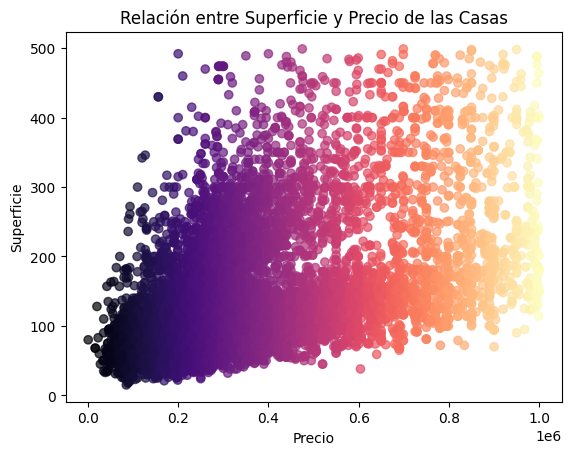

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds = ds.drop_duplicates()

ds['price'] = pd.to_numeric(ds['price'], errors='coerce').fillna(0)
ds['surface'] = pd.to_numeric(ds['surface'], errors='coerce').fillna(0)

formated_ds = ds[(ds['price'] != 0) & (ds['surface'] != 0) & (ds['price'] < 1e6) & (ds['surface'] < 500)]

colors = formated_ds['price']
sizes = 100 * np.log1p(formated_ds['surface'])

plt.scatter(formated_ds['price'], formated_ds['surface'], alpha=0.7, c=colors, cmap='magma')
plt.title('Relación entre Superficie y Precio de las Casas')
plt.xlabel('Precio')
plt.ylabel('Superficie')
plt.show()

En la gráfica se observa que, a pesar de que existe cierta relación entre el precio y la superficie de las viviendas, no es lineal. Aunque con el aumento del precio también lo hace la superficie, esto no se produce de manera uniforme. Podemos apreciar esto al ver que el rango mayor de superficies se concentra entre los 50 a 300 m2, mientras que los precios van desde 100.000 a 600.000 euros, pudiendo apreciar que algunas viviendas tienen un precio muy alto para una superficie relativamente pequeña.

#### Ejercicio 12. ¿Cuántas agencia de bienes raíces contiene el dataset? (★★☆)

Imprime el valor obtenido.

In [13]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds = ds.drop_duplicates().dropna(subset=['id_realEstates', 'realEstate_name'])

num_agencies_by_id = ds['id_realEstates'].nunique()
num_agencies_by_name = ds['realEstate_name'].nunique()

print(f"Número de Agencias por id: {num_agencies_by_id}")
print(f"Número de Agencias por nombre: {num_agencies_by_name}")
print(f"Si tomamos como referencia los datos id_realEstates y realEstate_name para contar el número de agencias de bienes raíces, suponiendo que el primero pudiera ser un identificador único por cada agencia y el segundo el nombre de las mismas, al obtener la cantidad de ambos valores de forma única observamos cierta incoherencia. Por ello, al no saber si el identificador es único para cada agencia, podríamos llegar a la conclusión de que en el dataset hay al menos {num_agencies_by_name} agencias de bienes raíces, basándonos en sus nombres")

Número de Agencias por id: 14207
Número de Agencias por nombre: 1821
Si tomamos como referencia los datos id_realEstates y realEstate_name para contar el número de agencias de bienes raíces, suponiendo que el primero pudiera ser un identificador único por cada agencia y el segundo el nombre de las mismas, al obtener la cantidad de ambos valores de forma única observamos cierta incoherencia. Por ello, al no saber si el identificador es único para cada agencia, podríamos llegar a la conclusión de que en el dataset hay al menos 1821 agencias de bienes raíces, basándonos en sus nombres


#### Ejercicio 13. ¿Cuál es la población (columna level5) que contiene la mayor cantidad de casas?(★★☆)

Imprima la población y el número de casas.

In [14]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds = ds.drop_duplicates()
ds = ds.dropna(subset=['level5'])

population = ds['level5'].value_counts()

get_formatted_string = lambda str: ' '.join(str.strip().split())

if not population.empty:
    max_population = population.idxmax()
    num_houses_max_population = population[max_population]

    print(f"La población que contiene mayor cantidad de viviendas es {get_formatted_string(max_population)}, con un total de {num_houses_max_population:,} casas")
else:
    print("No hay datos suficientes para determinar la población con mayor cantidad de viviendas.")

La población que contiene mayor cantidad de viviendas es Madrid Capital, con un total de 6,643 casas


#### Ejercicio 14. Ahora vamos a trabajar con el "cinturón sur" de Madrid. Haz un subconjunto del DataFrame original que contenga las siguientes poblaciones (columna level5): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Pista: Filtra el DataFrame original usando la columna `level5` y la función `isin`.

In [15]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds = ds.drop_duplicates()
ds = ds.dropna(subset=['level5'])

cities = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]
cities_filter_ds = ds[ds['level5'].isin(cities)]

if cities_filter_ds.empty:
    print("No se encontraron datos para las ciudades especificadas.")
else:
    print(cities_filter_ds)

       Unnamed: 0  id_realEstates  isNew  \
1               2       153867863  False   
3               4       152776331  False   
85             86       153152077  False   
94             95       153995577  False   
109           110       153586414  False   
...           ...             ...    ...   
15275       15276       153903887  False   
15291       15292       151697757  False   
15305       15306       153902389  False   
15322       15323       153871864  False   
15325       15326       153901467  False   

                                 realEstate_name  phone_realEstate  \
1              tecnocasa fuenlabrada ferrocarril       916358736.0   
3              tecnocasa fuenlabrada ferrocarril       916358736.0   
85                       sinergical inmobiliaria               NaN   
94                               viviendas365com       911226014.0   
109              area uno asesores inmobiliarios       912664081.0   
...                                          ...   

#### Ejercicio 15. Traza un gráfico de barras de la mediana de los precios y explica lo que observas (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprima un gráfico de barras de la mediana de precios y escriba en la celda Markdown un breve análisis sobre el gráfico.

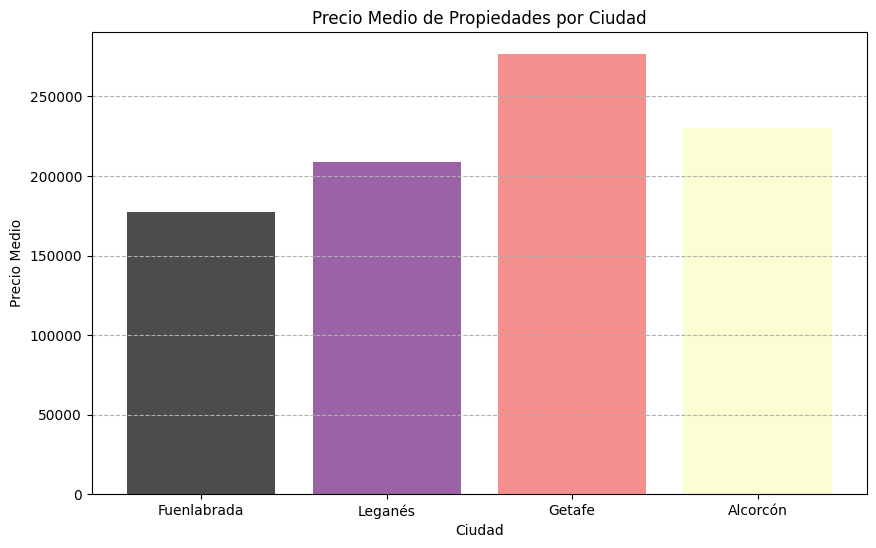

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds = ds.drop_duplicates()
ds = ds.dropna(subset=['level5'])

cities = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]
cities_filter_ds = ds[ds['level5'].isin(cities)]

def get_mean_price(zone):
    zone_data = ds[ds['level5'].str.contains(zone, na=False)].copy()
    zone_data['price'] = pd.to_numeric(zone_data['price'], errors='coerce')
    zone_formated_data = zone_data[zone_data['price'] > 0]

    return round(zone_formated_data['price'].mean(), 2)

mean_prices = [get_mean_price('Fuenlabrada'), get_mean_price('Leganés'), get_mean_price('Getafe'), get_mean_price('Alcorcón')]
cmap = plt.get_cmap('magma')
colors = cmap(np.linspace(0, 1, len(cities)))

plt.figure(figsize=(10, 6))
plt.bar(cities, mean_prices, color=colors, alpha=0.7)
plt.title('Precio Medio de Propiedades por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Precio Medio')
plt.grid(axis='y', linestyle='--')
plt.show()

En la gráfica podemos observar que los precios medios de las poblaciones del cinturón sur de Madrid oscilan entre unos 175.000 y 275.000 respectivamente. Siendo la media más alta la de Getafe y la más baja la de Fuenlabrada.

#### Ejercicio 16. Calcula la media y la varianza de muestra para las siguientes variables: precio, habitaciones, superficie y baños (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprime ambos valores por cada variable.

In [17]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds = ds.drop_duplicates()
ds = ds.dropna(subset=['level5'])

ds['price'] = pd.to_numeric(ds['price'], errors='coerce')
ds['rooms'] = pd.to_numeric(ds['rooms'], errors='coerce')
ds['surface'] = pd.to_numeric(ds['surface'], errors='coerce')
ds['bathrooms'] = pd.to_numeric(ds['bathrooms'], errors='coerce')

cities = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]
cities_filter_ds = ds[ds['level5'].isin(cities) & (ds['price'] > 0)]

get_mean = lambda data: cities_filter_ds[data].mean()
get_variance = lambda data: round(cities_filter_ds[data].var(), 2)
get_formatted_number = lambda n: f"{n:,.2f}"

print(f"La media de precio es de {get_formatted_number(get_mean('price'))} EUR y la varianza de {get_formatted_number(get_variance('price'))}")
print(f"La media de habitaciones es de {round(get_mean('rooms'))} y la varianza de {get_formatted_number(get_variance('rooms'))}")
print(f"La media de superficie es de {get_formatted_number(get_mean('surface'))} y la varianza de {get_formatted_number(get_variance('surface'))}")
print(f"La media de baños es de {round(get_mean('bathrooms'))} y la varianza de {get_formatted_number(get_variance('bathrooms'))}")


La media de precio es de 226,085.69 EUR y la varianza de 14,444,627,877.73
La media de habitaciones es de 3 y la varianza de 0.72
La media de superficie es de 111.30 y la varianza de 4,275.92
La media de baños es de 2 y la varianza de 0.58


#### Ejercicio 17. ¿Cuál es la casa más cara de cada población? Debes usar el subset obtenido en la pregunta 14 (★★☆)

Imprime tanto la dirección como el precio de la casa seleccionada de cada población. Puedes imprimir un DataFrame o una sola línea para cada población.

In [18]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds = ds.drop_duplicates()
ds = ds.dropna(subset=['level5'])

cities = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]
cities_filter_ds = ds[ds['level5'].isin(cities)]

get_formatted_string = lambda str: ' '.join(str.strip().split())

def get_most_expensive_data_per_zone(zone):
    zone_data = cities_filter_ds[cities_filter_ds['level5'].str.contains(zone)]
    zone_formated_data = zone_data[zone_data['price'] > 0]

    if zone_formated_data.empty:
        print(f"No se encontraron datos para la zona de {zone}")
        return
    else:
        most_expensive_index = zone_formated_data['price'].idxmax()
        most_expensive_data = zone_formated_data.loc[most_expensive_index]
        price_formatted = f"{most_expensive_data['price']:,.2f} EUR"
        print(f"La casa más cara de {zone} es la de {get_formatted_string(most_expensive_data['address'])}, con un precio de {price_formatted}")

for each in cities:
    get_most_expensive_data_per_zone(each)

La casa más cara de Fuenlabrada es la de Calle de Paulo Freire, 5, Fuenlabrada, con un precio de 490,000.00 EUR
La casa más cara de Leganés es la de Avenida Reina Sofía, Leganés, con un precio de 650,000.00 EUR
La casa más cara de Getafe es la de Getafe, con un precio de 1,050,000.00 EUR
La casa más cara de Alcorcón es la de Alcorcón, con un precio de 950,000.00 EUR


#### Ejercicio 18. Normaliza la variable de precios para cada población y traza los 4 histogramas en el mismo gráfico (debes usar el subconjunto obtenido en la pregunta 14) (★★★)

Para el método de normalización, puedes usar el que consideres adecuado, no hay una única respuesta correcta para esta pregunta. Imprime el gráfico y escribe en la celda de Markdown un breve análisis sobre el gráfico.

Pista: Puedes ayudarte revisando la demostración multihist de Matplotlib.

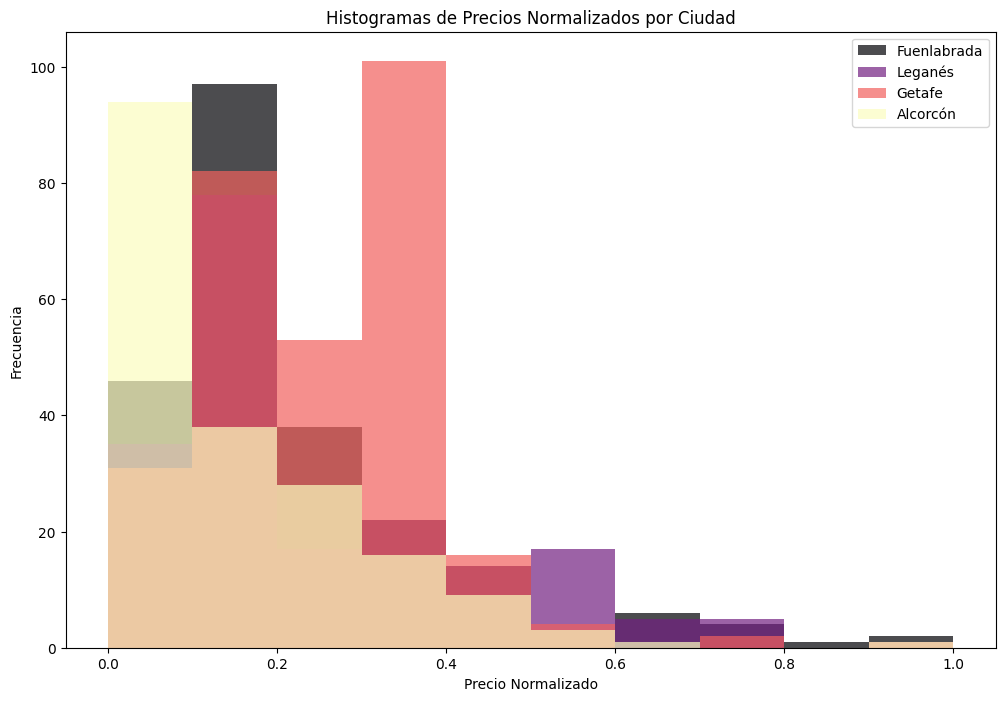

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds = ds.drop_duplicates()
ds = ds.dropna(subset=['level5'])

cities = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]
cities_filter_ds = ds[ds['level5'].isin(cities)].copy()

for city in cities:
    city_data = cities_filter_ds[cities_filter_ds['level5'] == city]
    min_price = city_data['price'].min()
    max_price = city_data['price'].max()
    cities_filter_ds.loc[cities_filter_ds['level5'] == city, 'normalized_price'] = (city_data['price'] - min_price) / (max_price - min_price)

plt.figure(figsize=(12, 8))
colors = plt.cm.magma(np.linspace(0, 1, len(cities)))

for i, city in enumerate(cities):
    plt.hist(cities_filter_ds[cities_filter_ds['level5'] == city]['normalized_price'], alpha=0.7, label=city, bins=10, color=colors[i])

plt.title('Histogramas de Precios Normalizados por Ciudad')
plt.xlabel('Precio Normalizado')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

En el gráfico se puede comparar la distribución de precios de Fuenlabrada, Leganés, Getafe y Alcorcón, permitiendo apreciar que Getafe y Fuenlabrada tienen una alta concentración de propiedades en los precios más bajos, mientras que Alcorcón muestra una mayor dispersión hacia precios medios. Por otro lado, Leganés destaca por tener una distribución más equilibrada con una mayor proporción de propiedades de precio medio y algunas en los rangos más altos. En general, los precios tienden a concentrarse en los rangos bajos en todas las ciudades, pero Leganés presenta una mayor variedad en su mercado inmobiliario.

#### Ejercicio 19. ¿Qué puedes decir sobre el precio por metro cuadrado (precio/m2) entre los municipios de 'Getafe' y 'Alcorcón'? Debes usar el subconjunto obtenido en la pregunta 14 (★★☆)

Pista: Crea una nueva columna llamada `pps` (price per square en inglés) y luego analiza los valores

In [20]:
import pandas as pd

ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds = ds.drop_duplicates()
ds = ds.dropna(subset=['level5'])

cities = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]
cities_filter_ds = ds[ds['level5'].isin(cities)].copy()

cities_filter_ds['pps'] = cities_filter_ds['price'] / cities_filter_ds['surface']
cities_filter_ds['pps'] = cities_filter_ds['pps'].fillna(0).replace([float('inf'), -float('inf')], 0)

def get_mean_pps(zone):
    zone_data = cities_filter_ds[cities_filter_ds['level5'].str.contains(zone, na=False) & (cities_filter_ds['pps'] > 0)]

    if zone_data.empty:
        print(f"No se encontraron datos para la zona '{zone}'.")
        return 0
    else:
        mean_pps = zone_data['pps'].mean()
        return round(mean_pps, 2) if pd.notna(mean_pps) else 0
    
get_percentage = lambda a, b: (a / b) * 100 if b != 0 else 0
get_formatted_price = lambda price: f"{price:,.2f} EUR"

getafe_mean_pps = get_mean_pps('Getafe')
alcorcon_mean_pps = get_mean_pps('Alcorcón')
percentage = get_percentage(getafe_mean_pps, alcorcon_mean_pps)

if valdemorillo_mean_pps > 0 and galapagar_mean_pps > 0:
    diff = abs(round(percentage - 100, 2))
    comparison = 'bajos' if percentage - 100 < 0 else 'altos'

    print(f"Precio promedio en Getafe: {get_formatted_price(getafe_mean_pps)}")
    print(f"Precio promedio en Alcorcón: {get_formatted_price(alcorcon_mean_pps)}")
    print(f"Los promedios de precio por metro cuadrado en Getafe son un {diff}% más {comparison} que los de Alcorcón.")
else:
    print("No se puede calcular la comparación entre las dos zonas debido a datos insuficientes.")

Precio promedio en Getafe: 2,174.59 EUR
Precio promedio en Alcorcón: 2,239.30 EUR
Los promedios de precio por metro cuadrado en Getafe son un 2.89% más bajos que los de Alcorcón.


#### Ejercicio 20. Realiza el mismo gráfico para 4 poblaciones diferentes (columna level5) y colócalos en el mismo gráfico. Debes usar el subconjunto obtenido en la pregunta 14 (★★☆) 
Pista: Haz un diagrama de dispersión de cada población usando subgráficos (subplots).

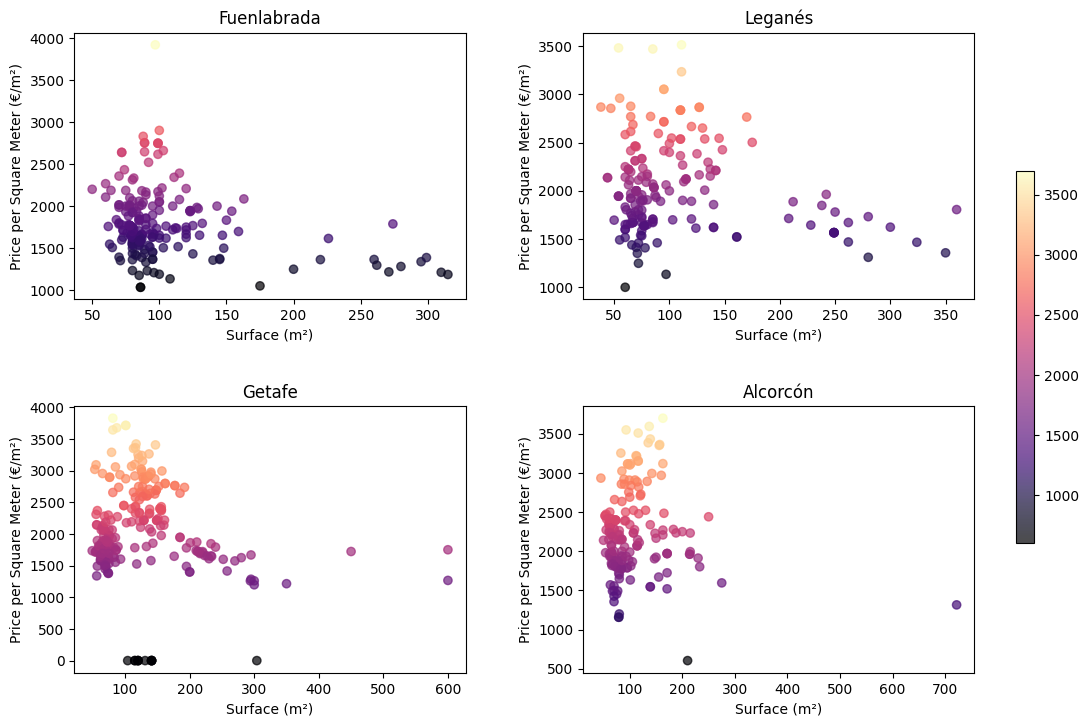

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds = ds.drop_duplicates()
ds = ds.dropna(subset=['level5'])

cities = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]
cities_filter_ds = ds[ds['level5'].isin(cities)].copy()
cities_filter_ds['pps'] = cities_filter_ds['price'] / cities_filter_ds['surface']
cities_filter_ds['pps'] = cities_filter_ds['pps'].fillna(0).replace([float('inf'), -float('inf')], 0)

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

cities_subplot = [(0, 0), (0, 1), (1, 0), (1, 1)]
for i, city in enumerate(cities):
    row, col = cities_subplot[i]
    city_data = cities_filter_ds[cities_filter_ds['level5'] == city]
    
    scatter = axs[row, col].scatter(city_data['surface'], city_data['pps'], 
                                    c=city_data['pps'], cmap='magma', alpha=0.7)
    axs[row, col].set_title(f'{city}')
    axs[row, col].set_xlabel('Surface (m²)')
    axs[row, col].set_ylabel('Price per Square Meter (€/m²)')
    
fig.colorbar(scatter, ax=axs, orientation='vertical', fraction=0.02)

plt.subplots_adjust(left=0.1, right=0.85, top=0.9, bottom=0.1, wspace=0.3, hspace=0.4)
plt.show()



#### Ejercicio 21. Realiza un trazado de las coordenadas (columnas latitud y longitud) del cinturón sur de Madrid por color de cada población (debes usar el subconjunto obtenido del Ejercicio 14) (★★★★)

Ejecuta la siguiente celda y luego comienza a codear en la siguiente. Debes implementar un código simple que transforme las columnas de coordenadas en un diccionario de Python (agrega más información si es necesario) y agrégala al mapa.

In [22]:
from ipyleaflet import Map, basemaps

# Mapa centrado en (60 grados latitud y -2.2 grados longitud)
# Latitud, longitud
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20,
    basemap=basemaps.OpenStreetMap.Mapnik)
map

Map(center=[60, -2.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [23]:
import pandas as pd
from ipyleaflet import CircleMarker
import matplotlib.pyplot as plt

ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds = ds.drop_duplicates()
ds = ds.dropna(subset=['level5'])

cities = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]
cities_filter_ds = ds[ds['level5'].isin(cities)].copy()

cities_filter_ds['latitude'] = cities_filter_ds['latitude'].str.replace(',', '.').astype(float)
cities_filter_ds['longitude'] = cities_filter_ds['longitude'].str.replace(',', '.').astype(float)

formated_ds = cities_filter_ds[(cities_filter_ds['latitude'] != 0) & (cities_filter_ds['longitude'] != 0)]
locations = list(zip(formated_ds['latitude'], formated_ds['longitude']))

latitudes = formated_ds['latitude']
longitudes = formated_ds['longitude']
lat_min, lat_max = latitudes.min(), latitudes.max()
lon_min, lon_max = longitudes.min(), longitudes.max()

map_center = [(lat_min + lat_max) / 2, (lon_min + lon_max) / 2]
map = Map(center=map_center, zoom=12)

colors = plt.get_cmap('magma', len(formated_ds))

for i, each in enumerate(locations):
    color = colors(i / len(locations))
    hex_color = "#{:02x}{:02x}{:02x}".format(int(color[0] * 255), int(color[1] * 255), int(color[2] * 255))
    circle = CircleMarker(location=list(each), radius=6, color=hex_color, fill_color=hex_color, fill_opacity=0.6)
    map.add_layer(circle)

map

Map(center=[np.float64(40.316890636437606), np.float64(-3.78610075)], controls=(ZoomControl(options=['position…